## ENVE 576 HWK#2
### Al Mitchell
### 2/15/2023

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math
from scipy import stats
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import os
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Problem 1: Emission models and dynamics (50 points)
An architectural paint product was tested for emissions of total volatile organic compounds (TVOC). Tests were performed in a well-mixed 100-L stainless steel chamber with a constant air change rate of 1.0 hr-1 . A freshly painted 40 cm x 40 cm drywall specimen was placed in the test chamber and samples were collected to quantify TVOC concentrations in the chamber air over an 8-hour period. The TVOC concentration in the inlet air entering the chamber was negligible due to the use of an activated carbon filter for the incoming air stream. It was confirmed through parallel testing in a control chamber that only a negligible amount of TVOC mass was adsorbed to the walls of the test chamber (i.e., you can neglect sorption as a sink in the chamber). The resulting measured TVOC concentration data are shown in the table below. 

- Calculate and plot the area-normalized TVOC emission factor [in units of mg/(min-m2 )] versus time using these data. 
- Does the time-varying TVOC emission rate appear to reasonably fit an empirical first-order decay model over the 8-hour duration of emissions? 
    - Yes it hits first order decay, to an asymptote of zero
- Briefly explain why or why not.

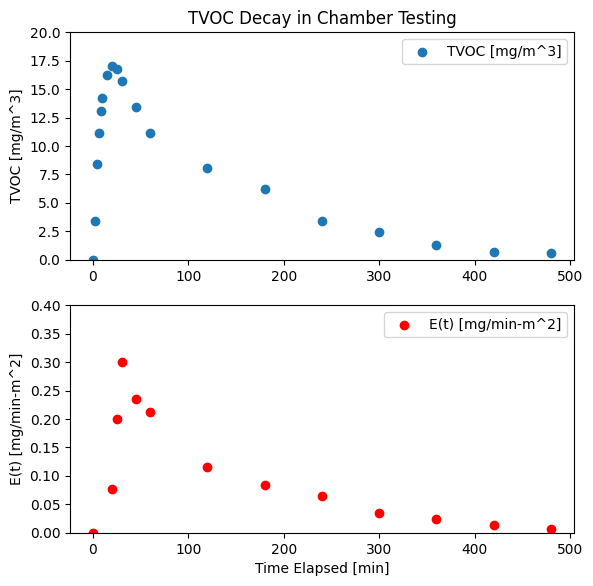

In [154]:
# Given data 
time = [0,2,4,6,8,10,15,20,25,30,45,60,120,180,240,300,360,420,480]
TVOC = [0,3.4,8.4,11.1,13.1,14.2,16.2,17,16.8,15.7,13.4,11.1,8.1,6.2,3.4,2.4,1.3,0.7,0.6]

# E(t) = Q*C + V*((C2-c1)/(T2-T1))

V = 0.1 #m^3
Q = 0.1/60 #m^3/min
A = 0.4*0.4 #m^2

step = -1
E = []
for t in time:
    step = step + 1
    Et = Q*TVOC[step] - V*((TVOC[step]-TVOC[step-1])/(time[step]-time[step-1]))
    E.append(Et/A)

fig, ax = plt.subplots(2,1,figsize=(6.5,6.5))
ax[0].scatter(time,TVOC,label='TVOC [mg/m^3]')
ax[1].scatter(time,E,label='E(t) [mg/min-m^2]',color='r')
ax[0].legend()
ax[1].legend()
ax[0].set_title('TVOC Decay in Chamber Testing')
ax[1].set_xlabel('Time Elapsed [min]')
ax[0].set_ylabel('TVOC [mg/m^3]')
ax[1].set_ylabel('E(t) [mg/min-m^2]')
ax[0].set_ybound(0,20)
ax[1].set_ybound(0,0.4)


## Problem 2: Adsorption/desorption dynamics (50 points)

Consider a residential kitchen (volume = 50 m3 ) in which an occupant (a prominent author named Ben Zane Kitchens) enters, cooks a meal on a gas stove for a period of time, and then stops cooking and eats the prepared food in the kitchen. Although cooking emits a wide range of VOCs and fine and ultrafine particulate matter, we will focus only on benzene for this problem. Assume the following:
- Ben enters the kitchen at 5:00 PM and begins stir-frying traditional Chinese food (a mix of meat
and vegetables) in a blend of oils. Ben cooks for exactly 1 hour until 6:00 PM and then stops,
turning off the stove.
- The average benzene emission rate during cooking this type of food in this way is approximately
0.1 mg/min (Chen et al., 2018). (Note that the fuel source of the stove hardly matters here; most
of the emissions are from heating oils and food).
- The air change rate in the kitchen is 0.5 h-1 and the occupant does not operate an exhaust fan or
range hood. Assume the air in the kitchen is always reasonably well-mixed.
- The surface-area-to-volume ratio (A/V) of the kitchen is 1.9 m2 /m3 (Manuja et al., 2019). Assume
that 25% of the surface area is painted drywall, 25% of the surface area is vinyl floor tiles, 25%
of the surface area is ceiling tile, and the rest of the surface area is nonporous (and non-sorptive).
- Assume the following adsorption (ka ) and desorption (kd ) coefficients for benzene for the three
main types of materials in the kitchen (adapted from An et al., 1999):

Assuming painted drywall, vinyl floor tiles, and ceiling tiles are the only sorptive surfaces, derive unsteady mass balance equations that incorporate non-equilibrium sorptive dynamics to predict the concentration of benzene in indoor air in the kitchen, as well as the mass concentration of benzene on the three different types of sources. Be sure to use a sufficiently small time step (e.g., 10 minutes or less) such that the solution can converge.

- Plot (separately) the concentrations of benzene in air (μg/m3 ) and adsorbed to each of the three surface types (μg/m2 ) versus time from 5:00 PM (t = 0) to 5:00 AM (t = 12 hours). 
- Assume the initial concentration of benzene in air and on surfaces at 5:00 PM is zero. Compare your results to a plot of the concentrations of benzene in air assuming that there are no sorptive sinks. 
- Identify the peak concentration of benzene in indoor air under both scenarios (sorption and no sorption)


In [155]:
V = 50 #m^3
E_benzene = 0.1 #mg/min
ACH = (0.5/60)
Q = (V*ACH)/60
AV = 1.9 #m2/m3 0.25 drywall, 0.25 vinyl, 0.25 ceiling, 0.25 irrelevant
A_dryWall = AV*V*0.25
A_vinylTile = AV*V*0.25
A_ceiling = AV*V*0.25

ka_DryWall = 0.18/60
kd_DryWall = 0.14/60
ka_VinylTile = 0.14/60
kd_VinylTile = 0.56/60
ka_Ceiling = 1.08/60
kd_Ceiling = 0.78/60



Peak Air Benzene [mg/m3] = 0.07733579789477366
Peak Drywall Benzene [mg/m2] = 0.01959043577621411
Peak Ceiling Benzene [mg/m2] = 0.05451496245673233
Peak Vinyl Benzene [mg/m2] = 0.008385360294967316


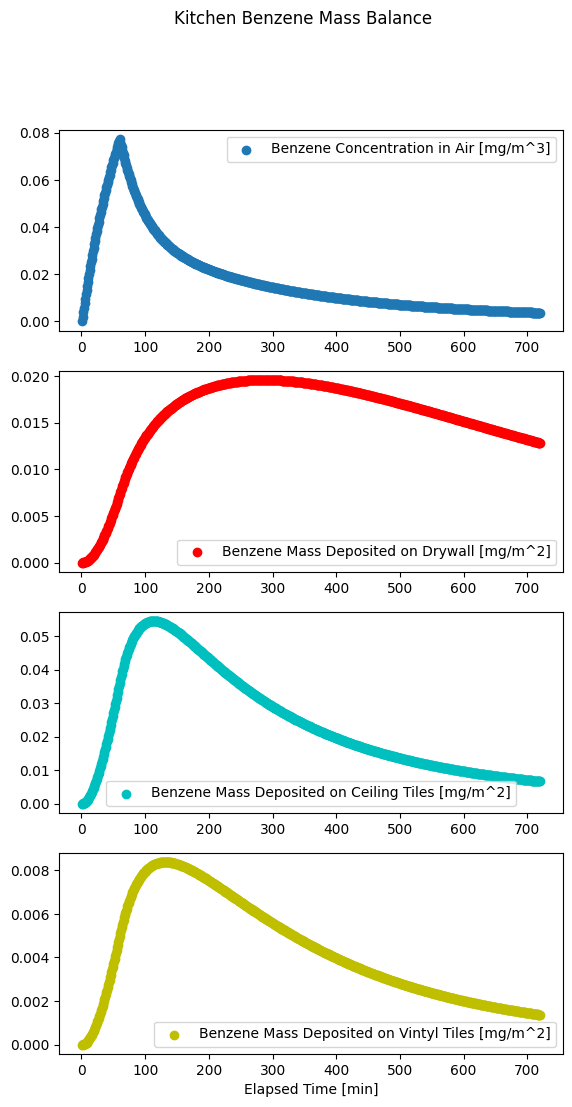

In [156]:
time = range(1,(12*60))

C_Air = [0]
M_DryWall = [0]
M_VinylTile = [0]
M_Ceiling = [0]


for t in time:
    if t < 60:
        C_Air.append(C_Air[t-1] + ((E_benzene/V) - (ACH*C_Air[t-1])
            + (kd_DryWall*M_DryWall[t-1]*(A_dryWall/V)))
            - (ka_Ceiling*C_Air[t-1]*(A_ceiling/V)) 
            + (kd_Ceiling*M_Ceiling[t-1]*(A_ceiling/V)) 
            - (ka_VinylTile*C_Air[t-1]*(A_vinylTile/V)) 
            + (kd_VinylTile*M_VinylTile[t-1]*(A_vinylTile/V)))  
        
        M_DryWall.append(M_DryWall[t-1] + (ka_DryWall*C_Air[t-1] - kd_DryWall*M_DryWall[t-1]))
        M_Ceiling.append(M_Ceiling[t-1] + (ka_Ceiling*C_Air[t-1] - kd_Ceiling*M_Ceiling[t-1]))
        M_VinylTile.append(M_VinylTile[t-1] + (ka_VinylTile*C_Air[t-1] - kd_VinylTile*M_VinylTile[t-1]))
    else:
        C_Air.append(C_Air[t-1] + (0 - (ACH*C_Air[t-1]) - (ka_DryWall*C_Air[t-1]*(A_dryWall/V)) 
            + (kd_DryWall*M_DryWall[t-1]*(A_dryWall/V)))
            - (ka_Ceiling*C_Air[t-1]*(A_ceiling/V)) 
            + (kd_Ceiling*M_Ceiling[t-1]*(A_ceiling/V)) 
            - (ka_VinylTile*C_Air[t-1]*(A_vinylTile/V)) 
            + (kd_VinylTile*M_VinylTile[t-1]*(A_vinylTile/V)))
        
        M_DryWall.append(M_DryWall[t-1] + (ka_DryWall*C_Air[t-1] - kd_DryWall*M_DryWall[t-1]))
        M_Ceiling.append(M_Ceiling[t-1] + (ka_Ceiling*C_Air[t-1] - kd_Ceiling*M_Ceiling[t-1]))
        M_VinylTile.append(M_VinylTile[t-1] + (ka_VinylTile*C_Air[t-1] - kd_VinylTile*M_VinylTile[t-1]))

time = range(1,((12*60)+1))
fig, ax = plt.subplots(4,1,figsize=(6.5,12))
ax[0].scatter(time, C_Air,label='Benzene Concentration in Air [mg/m^3]')
ax[0].legend()
ax[1].scatter(time,M_DryWall,label='Benzene Mass Deposited on Drywall [mg/m^2]',color='r')
ax[1].legend()
ax[2].scatter(time,M_Ceiling,label='Benzene Mass Deposited on Ceiling Tiles [mg/m^2]',color='c')
ax[2].legend()
ax[3].scatter(time,M_VinylTile,label='Benzene Mass Deposited on Vintyl Tiles [mg/m^2]',color='y')
ax[3].legend()
ax[3].set_xlabel('Elapsed Time [min]')
fig.suptitle('Kitchen Benzene Mass Balance')

print('Peak Air Benzene [mg/m3] = ' + str(max(C_Air)))
print('Peak Drywall Benzene [mg/m2] = ' + str(max(M_DryWall)))
print('Peak Ceiling Benzene [mg/m2] = ' + str(max(M_Ceiling)))
print('Peak Vinyl Benzene [mg/m2] = ' + str(max(M_VinylTile)))

Peak Air Benzene [mg/m3] = 0.0935165880872776


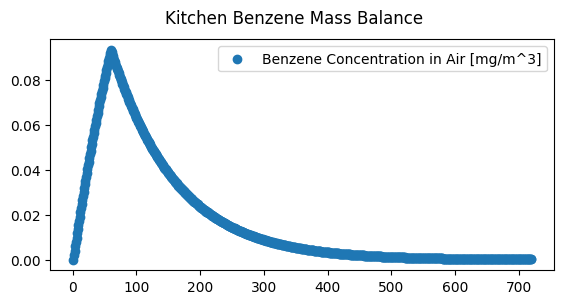

In [157]:
time = range(1,(12*60))

C_Air = []
M_DryWall = []
M_VinylTile = []
M_Ceiling = []

C_Air = [0]
M_DryWall = [0]
M_VinylTile = [0]
M_Ceiling = [0]


for t in time:
    if t < 60:
        C_Air.append(C_Air[t-1] + ((E_benzene/V) - (ACH*C_Air[t-1])))

    else:
        C_Air.append(C_Air[t-1] + (0 - (ACH*C_Air[t-1]) - (ka_DryWall*C_Air[t-1]*(A_dryWall/V))))
        #     + (kd_DryWall*M_DryWall[t-1]*(A_dryWall/V)))


time = range(1,((12*60)+1))
fig, ax = plt.subplots(figsize=(6.5,3))
ax.scatter(time, C_Air,label='Benzene Concentration in Air [mg/m^3]')
ax.legend()
fig.suptitle('Kitchen Benzene Mass Balance')

print('Peak Air Benzene [mg/m3] = ' + str(max(C_Air)))

## Problem 3: Reactive deposition (50 points)

### Part a) 
Consider a scenario in which indoor air containing ozone (O3) is flowing parallel to a flat surface, which can be reasonably approximated as a horizontal plate with characteristic length of 2 m. You can assume laminar flow conditions and an air temperature of 24°C. 

Estimate the 
1. total deposition velocity (vd)
1. transport-limited deposition velocity (vt)
1. surface-limited deposition velocity (vs)
1. overall deposition loss rate constant (kdep) 

for ozone over a wide range of ozone reaction probabilities (i.e., from 10^-8 to 10^0) and for three different air speeds of 0.1, 0.3, and 1 m/s (it is best to plot on a log-log plot with reaction probability on the x-axis. For part (iv), you can assume a surface-area-to-volume ratio in a space of 2.5 m2  m3 . Follow the fundamental analysis procedure outlined in our notes; i.e., you must calculate the transport-limited deposition velocity using fundamental mass transfer relationships (adapted from Cano-Ruiz et al., 1993).

### Part b) 
Accompanying this assignment on Blackboard is a data set of time-resolved indoor ozone concentration data measured during an experiment in an unoccupied apartment unit in which an ozone generator was used to inject ozone and temporarily elevate the indoor ozone concentration. A non-reactive tracer gas (CO 2) was also injected at the same time to measure the air change rate, and then monitoring instruments were left to measure the subsequent decay of both O 3 and CO2 . Analysis of the tracer gas data confirms that the air change rate in the unit was 0.5/hr during the test period. Using the ozone decay data
- estimate the indoor ozone decay rate coefficient (vd A/V = kdep ) in the apartment unit. You can assume the steady-state background indoor ozone concentration is 3 ppb (and be sure to subtract out the air change rate from the total ozone loss rate constant). 
- Last, let’s compare your answer in part (b) to your estimates of kdep in part (a) of this problem. Assuming the average air speed is 0.3 m/s in the apartment unit and that surface reactions can, on average, be reasonably approximated by flow over a horizontal flat plate like in part (a), what is the approximate average reaction probability of surfaces in the apartment unit? (you can provide a range of about an order of magnitude).




Vs = 0.0032740649040692094
Vt @ 0.1 m/s = 0.0006530555491850846
Vt @ 0.3 m/s = 0.0005655626956766812
Vt @ 1.0 m/s = 0.0010325714870184925
Vd = 0.0007849991872046473
K_dep = 0.0012725160432910624


Text(0.5, 0.98, 'Determining Deposition Velocity of Ozone')

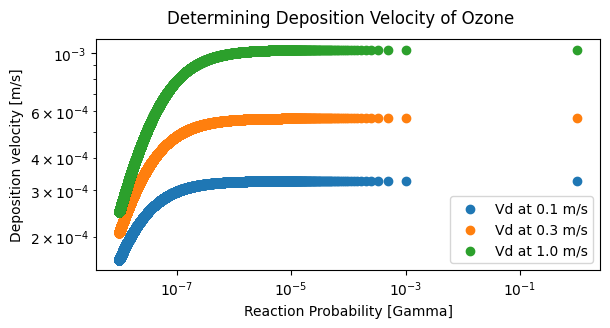

In [158]:
# Calculate Boltzman Velocity

Boltzman_Constant = 1.38e-23
Temp_abs = 273+24 #kelvin
pi = math.pi
Mass_Ozone = 48 #g/mol
Avagadros = 6.023e23
gamma = 10e-8

v_Boltzman = ((8*Boltzman_Constant*Temp_abs)/(pi*(Mass_Ozone/Avagadros)*(1/1000)))

Vs = 1/(4/(gamma*v_Boltzman))
print('Vs = ' + str(Vs))

U_inf = 0.1
Re_1 = (1.2*U_inf*2)/1.8e-5
Diff = 1.82e-5 #m 2 s t. #Cano 1993
Sc = 0.82 #cano 1993
Len = 2
Vt = 0.664*(Diff/Len)*(Sc**(1/3))*(Re_1**(1/2))
print('Vt @ 0.1 m/s = ' + str(Vt))

U_inf = 0.3
Re_1 = (1.2*U_inf*2)/1.8e-5
Diff = 1.82e-5 #m 2 s t. #Cano 1993
Sc = 0.82 #cano 1993
Len = 2
Vt = 0.332*(Diff/Len)*(Sc**(1/3))*(Re_1**(1/2))
print('Vt @ 0.3 m/s = ' + str(Vt))

U_inf = 1
Re_1 = (1.2*U_inf*2)/1.8e-5
Diff = 1.82e-5 #m 2 s t. #Cano 1993
Sc = 0.82 #cano 1993
Len = 2
Vt = 0.332*(Diff/Len)*(Sc**(1/3))*(Re_1**(1/2))
print('Vt @ 1.0 m/s = ' + str(Vt))

Vd = ((1/Vs) + (1/Vt))**(-1)

print('Vd = ' + str(Vd))

AV_Ratio = 2.25

def FVd(gam,U_inf):
    Vs = 1/(4/(gam*v_Boltzman))
    # U_inf = 1
    Re_1 = (1.2*U_inf*2)/1.8e-5
    Diff = 1.82e-5 #m 2 s t. #Cano 1993
    Sc = 0.82 #cano 1993
    Len = 2
    Vt = 0.332*(Diff/Len)*(Sc**(1/3))*(Re_1**(1/2))
    Vd = ((1/Vs) + (1/Vt))**(-1)
    
    return Vd

gammas = []
for x in (range(1,int(1e8),1000)):
    gammas.append(1/x)

Vd_01 = []
Vd_03 = []
Vd_1 = []

for g in gammas:
    Vd_01.append(FVd(g,0.1))
    Vd_03.append(FVd(g,0.3))
    Vd_1.append(FVd(g,1.0))

k_dep = max(Vd_03)*AV_Ratio
print('K_dep = '+str(k_dep))

# print(Vd_01)

fig, ax = plt.subplots(figsize=(6.5,3))
ax.scatter(gammas, Vd_01,label='Vd at 0.1 m/s')
ax.scatter(gammas, Vd_03,label='Vd at 0.3 m/s')
ax.scatter(gammas, Vd_1,label='Vd at 1.0 m/s')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('Reaction Probability [Gamma]')
ax.set_ylabel('Deposition velocity [m/s]')
fig.suptitle('Determining Deposition Velocity of Ozone')


In [159]:
# Part B

df = pd.read_csv('C:/Users/amitc_crl/OneDrive/Documents/GitHub/IIT-PhD/ENVE576/O3Data.csv')

O3_in = df['O3 (ppb)']
P  = 1
ACH = 0.5
index = 0

step = -1

C_O3_in = []
for ppb in O3_in:
    C_O3_in.append((ppb/10e9)*(1/(8.205e-5*293))*48)

dCdT = []
for y in range(0,97):
    y2 = y+1
    dCdT.append((C_O3_in[y2]-C_O3_in[y])/10)

k_dep_b = []
for t_step in range(0,97):
    C_O3_out = (3/10e9)*(1/(8.205e-5*293))*48
    k_dep_b.append(((P*(ACH/3600)*C_O3_out)-(ACH/3600)-dCdT[t_step])/C_O3_in[t_step])

print('Average K_Dep = '+str(mean(k_dep_b)))

print('Max K_dep from part a is 1.2 x 10^-3 while we have 2.5 x 10^1, off by magnitude of 4')


    

Average K_Dep = -25.151653096524846
Max K_dep from part a is 1.2 x 10^-3 while we have 2.5 x 10^1, off by magnitude of 4
